In [ ]:
from scoring import *

import unittest
import matplotlib.pyplot as plt
import numpy as np

# Import the scoring functions
def score_max_plus_mean(vals: list[float], maxWeight: float) -> float:
    """Calculate score based on the lists of floats. Gets max value, gets mean of remaining values.
    Adds them together using the weight of the max value to portion the sum of the two.
    
    Args:
        vals: List of float values to score
        maxWeight: Weight for the maximum value (between 0 and 1)
        
    Returns:
        Final weighted score
        
    Example:
        If maxWeight is 0.8, max value accounts for 80% of the total score
    """
    if not vals:
        return 0.0
    
    max_val = max(vals)
    remaining_vals = [v for v in vals if v != max_val]
    
    # If only one value in the list or all values are the same
    if not remaining_vals:
        return max_val
    
    mean_remaining = sum(remaining_vals) / len(remaining_vals)
    
    # Combine with weights
    return max_val * maxWeight + mean_remaining * (1 - maxWeight)


def max_plus_max(vals: list[float], maxWeight: float) -> float:
    """Calculate score based on the lists of floats. Gets max value, gets max of remaining values.
    Adds them together using the weight of the max value to portion the sum of the two.
    
    Args:
        vals: List of float values to score
        maxWeight: Weight for the maximum value (between 0 and 1)
        
    Returns:
        Final weighted score
        
    Example:
        If maxWeight is 0.8, max value accounts for 80% of the total score
    """
    if not vals:
        return 0.0
    
    max_val = max(vals)
    remaining_vals = [v for v in vals if v != max_val]
    
    # If only one value in the list
    if not remaining_vals:
        return max_val
    
    second_max = max(remaining_vals)
    
    # Combine with weights
    return max_val * maxWeight + second_max * (1 - maxWeight)


def weighted_top_n_average(vals: list[float], weights: list[float]) -> float:
    """Calculate score based on the top N values with custom weights for each position.
    
    Args:
        vals: List of float values to score
        weights: List of weights corresponding to top N values (should sum to 1)
        
    Returns:
        Weighted average of top N values
        
    Example:
        If weights is [0.5, 0.3, 0.2], the top value gets 50% weight,
        second gets 30%, and third gets 20%
    """
    if not vals or not weights:
        return 0.0
    
    # Sort values in descending order
    sorted_vals = sorted(vals, reverse=True)
    
    # Take only as many values as we have in both lists
    n = min(len(sorted_vals), len(weights))
    
    # Only use available values and their corresponding weights
    used_vals = sorted_vals[:n]
    used_weights = weights[:n]
    
    # Normalize weights to sum to 1
    weight_sum = sum(used_weights)
    if weight_sum == 0:
        return 0.0
    
    normalized_weights = [w / weight_sum for w in used_weights]
    
    # Calculate weighted sum
    return sum(val * weight for val, weight in zip(used_vals, normalized_weights))


def exponential_decay_weighting(vals: list[float], decayRate: float) -> float:
    """Calculate score using exponentially decreasing weights.
    
    Args:
        vals: List of float values to score
        decayRate: Rate at which weights decrease (between 0 and 1)
        
    Returns:
        Score with exponentially decayed weights
        
    Example:
        If decayRate is 0.5, weights would be [1, 0.5, 0.25, 0.125, ...]
    """
    if not vals:
        return 0.0
    
    # Sort values in descending order
    sorted_vals = sorted(vals, reverse=True)
    
    total_weight = 0.0
    weighted_sum = 0.0
    
    for i, val in enumerate(sorted_vals):
        weight = (1 - decayRate) ** i
        weighted_sum += val * weight
        total_weight += weight
    
    # Normalize by total weight
    return weighted_sum / total_weight if total_weight > 0 else 0.0


def primary_plus_threshold(vals: list[float], maxWeight: float, threshold: float) -> float:
    """Calculate score based on max value plus values that exceed a threshold.
    
    Args:
        vals: List of float values to score
        maxWeight: Weight for the maximum value (between 0 and 1)
        threshold: Minimum value to include in secondary calculation
        
    Returns:
        Weighted score combining max and above-threshold values
        
    Example:
        If maxWeight is 0.7 and threshold is 5.0, max value gets 70% weight,
        and mean of values >= 5.0 (excluding max) gets 30%
    """
    if not vals:
        return 0.0
    
    max_val = max(vals)
    above_threshold = [v for v in vals if v >= threshold and v != max_val]
    
    if not above_threshold:
        return max_val
    
    mean_above_threshold = sum(above_threshold) / len(above_threshold)
    
    # Combine with weights
    return max_val * maxWeight + mean_above_threshold * (1 - maxWeight)


In [6]:
.8*.9

0.7200000000000001

In [2]:
from scoring import *


l = [0.8, 0.5, 0.05]
w = [0.8, 0.15, 0.05]

print(f'Max plus mean          : {max_plus_mean(l, w[0])}')
print(f'Max plus max           : {max_plus_max(l, w[0])}')
print(f'Weighted top N average : {weighted_top_n_average(l, w)}')
print(f'Exponential decay      : {exponential_decay_weighting(l, 0.7)}')
print(f'Primary plus threshold : {primary_plus_threshold(l, w[0], 5)}')

print(f'max_plus_weighted_mean_capped   : {max_plus_weighted_mean_capped(l,  1)}')


Max plus mean          : 0.6950000000000001
Max plus max           : 0.7400000000000001
Weighted top N average : 0.7175
Exponential decay      : 0.6866906474820144
Primary plus threshold : 0.8
max_plus_weighted_mean_capped   : 1.0


......
----------------------------------------------------------------------
Ran 6 tests in 0.003s

OK


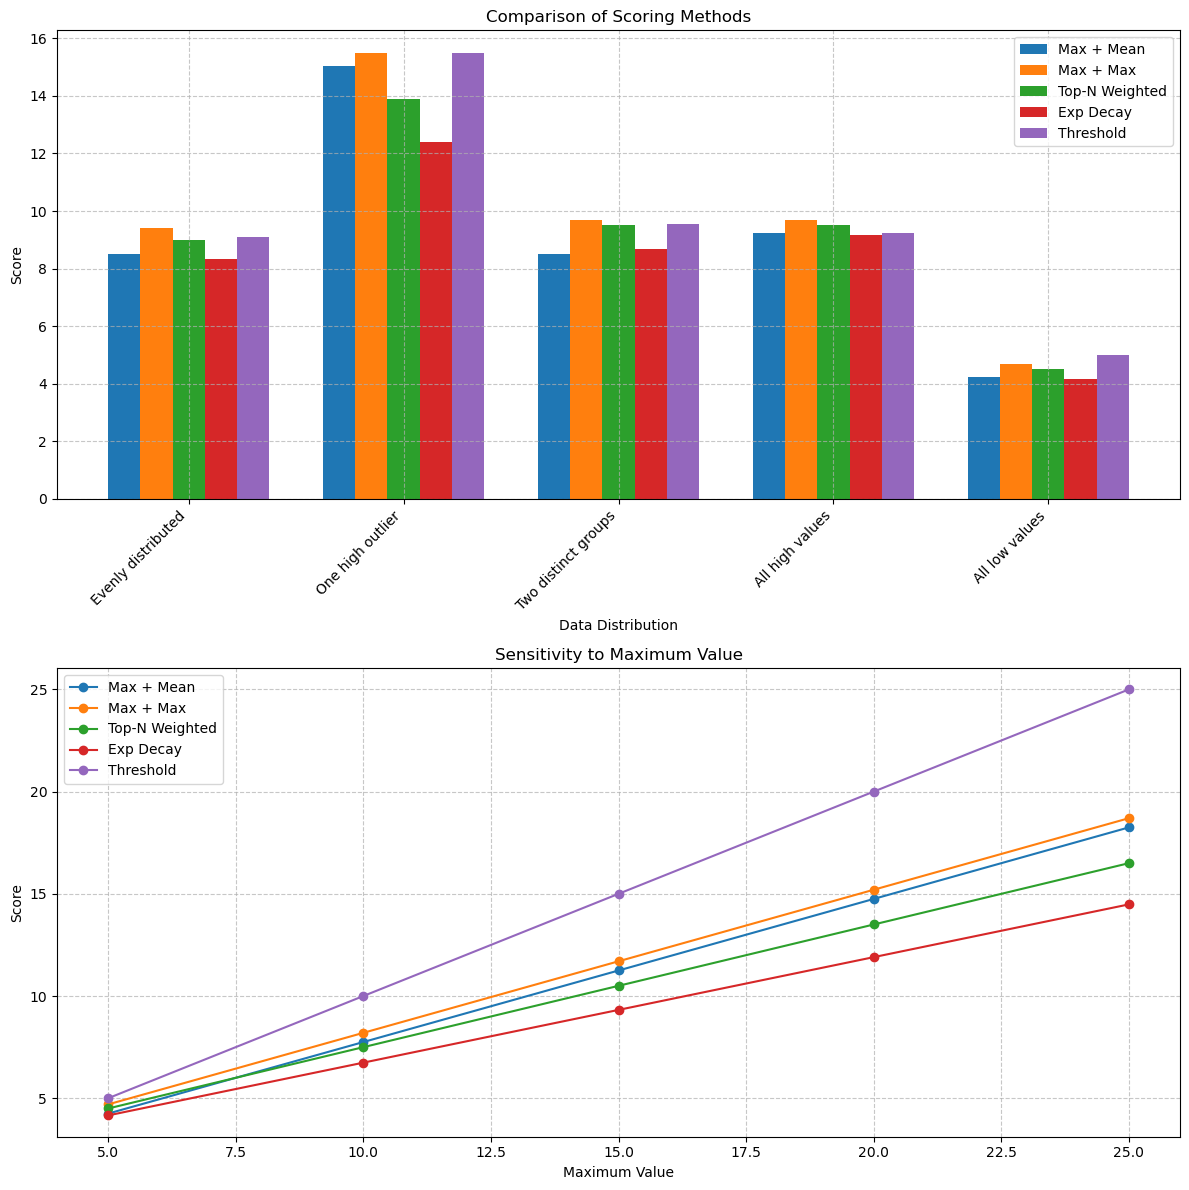


Interactive Test of Scoring Functions

Enter values separated by spaces (e.g., '10 7 4 2') or 'q' to quit:

Values: []
Invalid input. Please enter numbers separated by spaces.

Enter values separated by spaces (e.g., '10 7 4 2') or 'q' to quit:

Values: [15.0, 6.0, 2.0]
Max value: 15.0
Mean value: 7.67

Scoring Results:
Max + Mean (weight=0.7): 11.70
Max + Max (weight=0.7): 12.30
Top-N Weighted [0.6, 0.3, 0.1]: 11.00
Exponential Decay (rate=0.5): 10.57
Threshold (weight=0.7, threshold=5.0): 12.30

Enter values separated by spaces (e.g., '10 7 4 2') or 'q' to quit:

Values: [15.0, 6.0, 2.0]
Max value: 15.0
Mean value: 7.67

Scoring Results:
Max + Mean (weight=0.7): 11.70
Max + Max (weight=0.7): 12.30
Top-N Weighted [0.6, 0.3, 0.1]: 11.00
Exponential Decay (rate=0.5): 10.57
Threshold (weight=0.7, threshold=5.0): 12.30

Enter values separated by spaces (e.g., '10 7 4 2') or 'q' to quit:

Values: [15.0, 6.0, 2.0]
Max value: 15.0
Mean value: 7.67

Scoring Results:
Max + Mean (weight=0.7): 

In [1]:
import unittest
import matplotlib.pyplot as plt
import numpy as np
from scoring import *


class TestScoringFunctions(unittest.TestCase):
    """Unit tests for the scoring functions"""
    
    def test_empty_lists(self):
        """Test how functions handle empty lists"""
        self.assertEqual(score_max_plus_mean([], 0.8), 0.0)
        self.assertEqual(max_plus_max([], 0.8), 0.0)
        self.assertEqual(weighted_top_n_average([], [0.5, 0.3, 0.2]), 0.0)
        self.assertEqual(weighted_top_n_average([10, 5, 3], []), 0.0)
        self.assertEqual(exponential_decay_weighting([], 0.5), 0.0)
        self.assertEqual(primary_plus_threshold([], 0.7, 5.0), 0.0)
    
    def test_single_value(self):
        """Test with a single value"""
        self.assertEqual(score_max_plus_mean([10], 0.8), 10.0)
        self.assertEqual(max_plus_max([10], 0.8), 10.0)
        self.assertEqual(weighted_top_n_average([10], [0.5, 0.3, 0.2]), 10.0)
        self.assertEqual(exponential_decay_weighting([10], 0.5), 10.0)
        self.assertEqual(primary_plus_threshold([10], 0.7, 5.0), 10.0)
    
    def test_identical_values(self):
        """Test with a list of identical values"""
        self.assertEqual(score_max_plus_mean([5, 5, 5], 0.8), 5.0)
        self.assertEqual(max_plus_max([5, 5, 5], 0.8), 5.0)
        # For weighted_top_n_average with identical values, we expect weighted average to be the same value
        self.assertEqual(weighted_top_n_average([5, 5, 5], [0.5, 0.3, 0.2]), 5.0)
        self.assertEqual(exponential_decay_weighting([5, 5, 5], 0.5), 5.0)
        self.assertEqual(primary_plus_threshold([5, 5, 5], 0.7, 3.0), 5.0)
    

    def test_standard_case(self):
        """Test with a typical list of values"""
        vals = [10, 7, 4, 2]
        # max = 10, mean of rest = (7+4+2)/3 = 4.33
        # 10*0.8 + 4.33*0.2 = 8.0 + 0.87 = 8.87
        self.assertAlmostEqual(score_max_plus_mean(vals, 0.8), 8.87, places=2)
        
        # max = 10, second max = 7
        # 10*0.8 + 7*0.2 = 8.0 + 1.4 = 9.4
        self.assertEqual(max_plus_max(vals, 0.8), 9.4)
        
        # Weighted average: 10*0.5 + 7*0.3 + 4*0.2 = 5 + 2.1 + 0.8 = 7.9
        # Using assertAlmostEqual to handle floating point precision
        self.assertAlmostEqual(weighted_top_n_average(vals, [0.5, 0.3, 0.2]), 7.9, places=9)
        
        # Decay rate 0.5: weights = [1, 0.5, 0.25, 0.125]
        # Total weight = 1.875
        # Weighted sum = 10*1 + 7*0.5 + 4*0.25 + 2*0.125 = 10 + 3.5 + 1 + 0.25 = 14.75
        # Final score = 14.75/1.875 = 7.87
        self.assertAlmostEqual(exponential_decay_weighting(vals, 0.5), 7.87, places=2)
        
        # Threshold 5.0: max = 10, above threshold = [7]
        # 10*0.7 + 7*0.3 = 7.0 + 2.1 = 9.1
        self.assertAlmostEqual(primary_plus_threshold(vals, 0.7, 5.0), 9.1, places=9)
    
    def test_different_orders(self):
        """Test that the order of input doesn't matter"""
        vals1 = [10, 7, 4, 2]
        vals2 = [2, 10, 4, 7]
        
        self.assertAlmostEqual(score_max_plus_mean(vals1, 0.8), score_max_plus_mean(vals2, 0.8))
        self.assertEqual(max_plus_max(vals1, 0.8), max_plus_max(vals2, 0.8))
        self.assertAlmostEqual(weighted_top_n_average(vals1, [0.5, 0.3, 0.2]), 
                              weighted_top_n_average(vals2, [0.5, 0.3, 0.2]))
        self.assertAlmostEqual(exponential_decay_weighting(vals1, 0.5), 
                              exponential_decay_weighting(vals2, 0.5))
        self.assertEqual(primary_plus_threshold(vals1, 0.7, 5.0), 
                         primary_plus_threshold(vals2, 0.7, 5.0))
    
    def test_threshold_edge_cases(self):
        """Test threshold function with edge cases"""
        # No values above threshold
        self.assertEqual(primary_plus_threshold([10, 7, 4, 2], 0.7, 15.0), 10.0)
        
        # All values above threshold
        self.assertEqual(primary_plus_threshold([10, 7, 4, 2], 0.7, 1.0), 
                         10*0.7 + (7+4+2)/3*0.3)


def visualize_scoring_methods():
    """Visualize how different scoring methods behave with varying inputs"""
    # Sample data
    sample_data_sets = [
        [10, 8, 6, 4, 2],  # Evenly distributed
        [20, 5, 4, 3, 2],  # One high outlier
        [10, 9, 8, 2, 1],  # Two distinct groups
        [10, 9, 8, 7, 6],  # All high values
        [5, 4, 3, 2, 1]    # All low values
    ]
    
    labels = ['Evenly distributed', 'One high outlier', 'Two distinct groups', 
              'All high values', 'All low values']
    
    # Parameters for scoring functions
    max_weight = 0.7
    top_n_weights = [0.6, 0.3, 0.1]
    decay_rate = 0.5
    threshold = 5.0
    
    # Calculate scores for each data set
    scores = []
    for data in sample_data_sets:
        scores.append({
            'Max + Mean': score_max_plus_mean(data, max_weight),
            'Max + Max': max_plus_max(data, max_weight),
            'Top-N Weighted': weighted_top_n_average(data, top_n_weights),
            'Exp Decay': exponential_decay_weighting(data, decay_rate),
            'Threshold': primary_plus_threshold(data, max_weight, threshold)
        })
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Bar chart of scores
    methods = list(scores[0].keys())
    x = np.arange(len(labels))
    width = 0.15
    offsets = np.linspace(-(len(methods)-1)/2*width, (len(methods)-1)/2*width, len(methods))
    
    for i, method in enumerate(methods):
        method_scores = [score[method] for score in scores]
        ax1.bar(x + offsets[i], method_scores, width, label=method)
    
    ax1.set_xlabel('Data Distribution')
    ax1.set_ylabel('Score')
    ax1.set_title('Comparison of Scoring Methods')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Line chart to show sensitivity to max value
    max_values = range(5, 30, 5)
    base_data = [4, 3, 2, 1]
    
    sensitivity = {method: [] for method in methods}
    
    for max_val in max_values:
        test_data = [max_val] + base_data
        for method in methods:
            if method == 'Max + Mean':
                sensitivity[method].append(score_max_plus_mean(test_data, max_weight))
            elif method == 'Max + Max':
                sensitivity[method].append(max_plus_max(test_data, max_weight))
            elif method == 'Top-N Weighted':
                sensitivity[method].append(weighted_top_n_average(test_data, top_n_weights))
            elif method == 'Exp Decay':
                sensitivity[method].append(exponential_decay_weighting(test_data, decay_rate))
            elif method == 'Threshold':
                sensitivity[method].append(primary_plus_threshold(test_data, max_weight, threshold))
    
    for method in methods:
        ax2.plot(max_values, sensitivity[method], marker='o', label=method)
    
    ax2.set_xlabel('Maximum Value')
    ax2.set_ylabel('Score')
    ax2.set_title('Sensitivity to Maximum Value')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig('scoring_comparison.png')
    plt.show()


def interactive_test():
    """Interactive test to try different inputs"""
    print("\nInteractive Test of Scoring Functions")
    print("====================================")
    
    while True:
        print("\nEnter values separated by spaces (e.g., '10 7 4 2') or 'q' to quit:")
        user_input = input()
        
        if user_input.lower() == 'q':
            break
        
        try:
            vals = [float(x) for x in user_input.split()]
            
            max_weight = 0.7
            top_n_weights = [0.6, 0.3, 0.1]
            decay_rate = 0.5
            threshold = 5.0
            
            print(f"\nValues: {vals}")
            print(f"Max value: {max(vals)}")
            print(f"Mean value: {sum(vals)/len(vals):.2f}")
            print("\nScoring Results:")
            print(f"Max + Mean (weight={max_weight}): {score_max_plus_mean(vals, max_weight):.2f}")
            print(f"Max + Max (weight={max_weight}): {max_plus_max(vals, max_weight):.2f}")
            print(f"Top-N Weighted {top_n_weights}: {weighted_top_n_average(vals, top_n_weights):.2f}")
            print(f"Exponential Decay (rate={decay_rate}): {exponential_decay_weighting(vals, decay_rate):.2f}")
            print(f"Threshold (weight={max_weight}, threshold={threshold}): {primary_plus_threshold(vals, max_weight, threshold):.2f}")
            
        except ValueError:
            print("Invalid input. Please enter numbers separated by spaces.")


if __name__ == "__main__":
    # Run unit tests
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    
    # Visualize the scoring methods
    try:
        visualize_scoring_methods()
    except ImportError:
        print("Matplotlib not available for visualization.")
    
    # Run interactive test
    interactive_test()

In [4]:
from scoring import *
    

print('changing the max')
print(f" test 1: {round(max_plus_weighted_mean_capped([0.8, 0.2, 0.05], [0.8, 0.5]), 2)}")
print(f" test 1: {round(max_plus_weighted_mean_capped([0.5, 0.2, 0.05], [0.8, 0.5]), 2)}")
print(f" test 1: {round(max_plus_weighted_mean_capped([0.3, 0.2, 0.05], [0.8, 0.5]), 2)}")
print(f" test 1: {round(max_plus_weighted_mean_capped([0.1, 0.1, 0.05], [0.8, 0.5]), 2)}")

print('changing the secondry values')
print(f" test 1: {round(max_plus_weighted_mean_capped([0.5, 0.4, 0.3],   [0.7, 0.2]), 4)}")
print(f" test 1: {round(max_plus_weighted_mean_capped([0.5, 0.2, 0.15],  [0.7, 0.2]), 4)}")
print(f" test 1: {round(max_plus_weighted_mean_capped([0.5, 0.1, 0.075], [0.7, 0.2]), 4)}")

print(f" test 1: {round(max_plus_weighted_mean_capped([0.5, 0.1, 0.075], [0.8, 0.5]), 4)}")




changing the max
 test 1: 0.94
 test 1: 0.64
 test 1: 0.44
 test 1: 0.15
changing the secondry values
 test 1: 0.8778
 test 1: 0.6889
 test 1: 0.5944
 test 1: 0.5904
